In [5]:
# Logistic Regression with Python

#working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

## Import Libraries
#Let's import some libraries to get started!

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
## The Data

#Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [9]:
df= pd.read_csv('titanic_train.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)  # dropping unneccesary columns

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [14]:
df.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,True,False


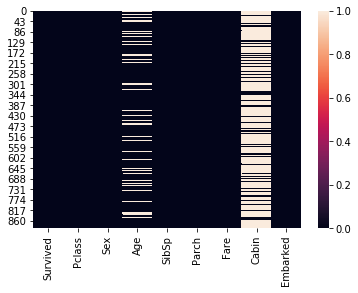

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.drop('Cabin',axis=1,inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


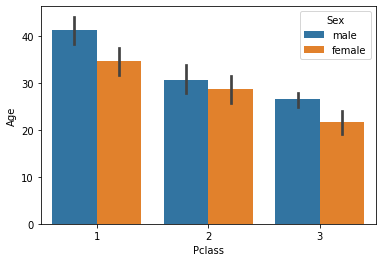

In [18]:
sns.barplot(x='Pclass',y='Age',data=df,hue='Sex')

In [19]:
df.groupby('Pclass')['Age'].mean()  ##df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [20]:
def func(cols):
    p=cols[0]
    a=cols[1]
    
    if pd.isnull(a):
        if p==1:
            return 38
        elif p==2:
            return 30
        else:
            return 25
        
    else:
        return a    ### if Age isnt empty return original Age value otherwise function will return null

In [21]:
df.groupby('Pclass')['Age'].mean()  ##df.groupby('Pclass').mean()['Age']df.groupby('Pclass')['Age'].mean()  ##df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

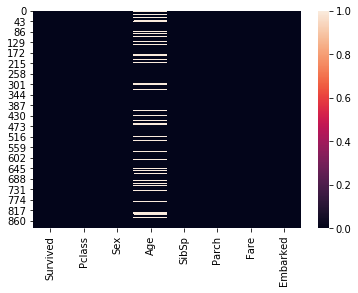

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.dropna(inplace=True)   # Embarked also has some null values which can be seen fron info command so dropping all null 

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [26]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
# Reducing n cols from category sex and embarked into n-1 ( reducing data without any loss)

In [29]:
sample=pd.get_dummies(df['Sex'])
sample.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [30]:
sex=pd.get_dummies(df['Sex'],drop_first=True) # new dataframe sex

In [31]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True) # new dataframe embarked

In [32]:
df=pd.concat([df,sex,embarked],axis=1) ## concatenating all three dataframe

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [34]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)  # dropping unnecessary cols

In [35]:
df.head() #######Finally Clean data set without labels but all values

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [36]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_Array=ss.fit_transform(df.drop('Survived',axis=1))

In [39]:
scaled_Array

array([[ 0.90859974, -0.52766856,  0.52251079, ...,  0.75613751,
        -0.20232566,  0.53403984],
       [-1.48298257,  0.57709388,  0.52251079, ..., -1.32251077,
        -0.20232566, -1.87251946],
       [ 0.90859974, -0.25147795, -0.55271372, ..., -1.32251077,
        -0.20232566,  0.53403984],
       ...,
       [-1.48298257, -0.73481151, -0.55271372, ..., -1.32251077,
        -0.20232566,  0.53403984],
       [-1.48298257, -0.25147795, -0.55271372, ...,  0.75613751,
        -0.20232566, -1.87251946],
       [ 0.90859974,  0.16280796, -0.55271372, ...,  0.75613751,
         4.94252683, -1.87251946]])

In [40]:
#X=pd.DataFrame(scaled_Array,columns=df.columns[1:]) #X=df.drop('Survived',axis=1)

In [41]:
X=df.drop('Survived',axis=1)

In [42]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [43]:
y=df['Survived']

In [44]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
type(y)

pandas.core.series.Series

In [46]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [47]:
#model=LinearRegression()

In [48]:
#model.fit(X_train,y_train)

In [49]:
#X_train.shape

In [50]:
#y_train.shape

In [51]:
#X_test.shape

In [52]:
#y_test.shape

In [53]:
from sklearn.linear_model import LogisticRegression


In [54]:
lr=LogisticRegression()

In [55]:
lr.fit(X_train,y_train)

C:\Users\ajay gadhe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred=lr.predict(X_test)

In [57]:
y_pred.shape

(214,)

In [58]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [59]:
##########Syrvived is a type of classification categoory..applying logistic regresstion/classification problem

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test,y_pred)

array([[107,  21],
       [ 27,  59]], dtype=int64)

In [ ]:
####166 correct predictions out of 214